# ANÁLISIS DE DATOS ABIERTOS: ¿Qué Factores Influyen en la Felicidad de un País?
## Sistemas Distribuidos, Empotrados y Ubicuos

**Análisis de Datos Abiertos**  
  
Belén Vivas García - belen.vivas@estudiante.uam.es

### Motivación
El índice de felicidad de los habitantes de los diferentes países del mundo siempre ha sido un tema de interés social y controversial. Hay muchos factores a tener en cuenta (sociales, culturales, económicos, políticos, etc.) a la hora de estimar cuáles son los países cuyos habitantes se consideran más felices.  
  
Este índice es importante ya que refleja el bienestar de una región y la efectividad de las políticas que ahí se estén llevando a cabo. Una población más feliz es una población más productiva, más saludable mental y físicamente, y más motivada a participar en actividades políticas y sociales que puedan fortalecer la estabilidad del país.  
  
Por tanto, nos interesa ver cuáles son los factores que tienen más impacto en la felicidad total de un país.

### Dataset
Para responder a esta pregunta, nos hemos descargado un dataset de [Kaggle - World Happiness Report 2023](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023). Este dataset contiene datos de los índices de felicidad por país en el año 2023, recogiendo además seis parámetros (factores) que pueden ser relacionados a estos índices para ver el impacto que causan en él.  
  
Estos datos están basados en el World Happiness Report, un documento que refleja los resultados de una encuesta que se realiza anualmente a nivel mundial. La de este año 2023 se ha realizado en marzo.
  
Se puede encontrar el fichero CSV en el directorio /data.

### Análisis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
# Lectura del fichero en un dataframe
df = pd.read_csv('data/WHR2023.csv')

# Nos quedamos con los campos que nos interesan
df = df.drop(['upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Dystopia + residual', 'Standard error of ladder score'], axis=1)
df = df.drop(df.filter(like='Explained').columns, axis=1)

df

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379
...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891


Como vemos, este dataset considera seis factores clave para determinar cómo de felices son los habitantes de un país:  
- **Logged GDP per cápita:** se refiere a la riqueza del país (PIB per cápita).  
- **Social support:** el apoyo social que recibe cada individuo en su día a día por parte de familiares o amigos.  
- **Healthy life expectancy:** mide la esperanza de vida de la población teniendo en cuenta su bienestar.  
- **Freedom to make life choices:** se refiere a la libertad que tienen los individuos para elegir diferentes aspectos de su vida diaria.  
- **Generosity:** es el porcentaje de la población que se considera generosa, y se mide en si han donado a alguna asociación en el último mes.  
- **Perceptions of corruption:** mide la percepción que tienen los ciudadanos sobre la corrupción del país por parte del gobierno y las empresas.

Ahora, obtendremos del ranking los diez países más felices y los diez menos felices, haciendo una pequeña comparación de cada uno de estos factores. De esta forma, tendremos una visión global.

#### Países más Felices

In [3]:
# 10 paises mas felices
head_df = df.head(10)
head_df

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379
5,Sweden,7.395,10.883,0.939,72.150,0.948,0.165,0.202
6,Norway,7.315,11.088,0.943,71.500,0.947,0.141,0.283
7,Switzerland,7.240,11.164,0.920,72.900,0.891,0.027,0.266
8,Luxembourg,7.228,11.660,0.879,71.675,0.915,0.024,0.345
9,New Zealand,7.123,10.662,0.952,70.350,0.887,0.175,0.271


Finlandia está a la cabeza, seguido de Dinamarca e Islandia. Hay muchos países del noroeste de Europa, los cuales siguen un modelo político, social y económico similar.

#### Países menos Felices

In [4]:
# 10 paises menos felices
tail_df = df.tail(10)
tail_df

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
127,Zambia,3.982,8.074,0.694,55.032,0.791,0.098,0.818
128,Tanzania,3.694,7.857,0.653,59.401,0.838,0.182,0.554
129,Comoros,3.545,8.075,0.471,59.425,0.470,-0.014,0.727
130,Malawi,3.495,7.302,0.531,58.475,0.750,0.005,0.749
131,Botswana,3.435,9.629,0.753,54.725,0.742,-0.215,0.830
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891
136,Afghanistan,1.859,7.324,0.341,54.712,0.382,-0.081,0.847


En contraste, aquí vemos una mayoría de países africanos y asiáticos. En concreto, Afganistán es el país considerado menos feliz del mundo, seguido del Líbano y Sierra Leona.

In [5]:
# Diferencias
# Paises mas felices
top_10_lad = head_df['Ladder score'].mean()
top_10_log = head_df['Logged GDP per capita'].mean()
top_10_ss = head_df['Social support'].mean()
top_10_h = head_df['Healthy life expectancy'].mean()
top_10_f = head_df['Freedom to make life choices'].mean()
top_10_g = head_df['Generosity'].mean()
top_10_c = head_df['Perceptions of corruption'].mean()

# Paises menos felices
low_10_lad = tail_df['Ladder score'].mean()
low_10_log = tail_df['Logged GDP per capita'].mean()
low_10_ss = tail_df['Social support'].mean()
low_10_h = tail_df['Healthy life expectancy'].mean()
low_10_f = tail_df['Freedom to make life choices'].mean()
low_10_g = tail_df['Generosity'].mean()
low_10_c = tail_df['Perceptions of corruption'].mean()

# Datos de la tabla
data = [['Factor', '10 más felices', '10 menos felices', 'Diferencia'],
        ['Ladder score', top_10_lad, low_10_lad, top_10_lad - low_10_lad],
        ['Logged GDP per capita', top_10_log, low_10_log, top_10_log - low_10_log],
        ['Social support', top_10_ss, low_10_ss, top_10_ss - low_10_ss],
        ['Healthy life expectancy', top_10_h, low_10_h, top_10_h - low_10_h],
        ['Freedom to make life choices', top_10_f, low_10_f, top_10_f - low_10_f],
        ['Generosity', top_10_g, low_10_g, top_10_g - low_10_g],
        ['Perceptions of corruption', top_10_c, low_10_c, top_10_c - low_10_c]]

print(tabulate(data, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════════════╤══════════════════╤════════════════════╤══════════════╕
│ Factor                       │   10 más felices │   10 menos felices │   Diferencia │
╞══════════════════════════════╪══════════════════╪════════════════════╪══════════════╡
│ Ladder score                 │           7.4097 │             3.1951 │       4.2146 │
├──────────────────────────────┼──────────────────┼────────────────────┼──────────────┤
│ Logged GDP per capita        │          10.9688 │             7.9781 │       2.9907 │
├──────────────────────────────┼──────────────────┼────────────────────┼──────────────┤
│ Social support               │           0.9412 │             0.587  │       0.3542 │
├──────────────────────────────┼──────────────────┼────────────────────┼──────────────┤
│ Healthy life expectancy      │          71.7272 │            57.2244 │      14.5028 │
├──────────────────────────────┼──────────────────┼────────────────────┼──────────────┤
│ Freedom to make life choices │

Haciendo la media de cada uno de los factores de los 10 países más felices y los 10 países menos felices para tener una representación de los dos extremos, hemos obtenido:  
- Una diferencia de 4 puntos en la felicidad total.  
- Diferencias de casi 3 puntos en el PIB per cápita.  
- Un 35% menos de apoyo social, es decir, en los países menos felices la población parece que no tiene allegados en los que confiar ante los problemas.  
- 14.5 años menos de esperanza de vida saludable. En los países más felices las personas tienen una media de 71.73 años de esperanza de vida saludable (teniendo en cuenta enfermedades, discapacidades, etc.), mientras que en los países mneos felices no llegan a los 58 años.
- Un 26.9% menos de libertad de elección en los países menos felices.  
- La generosidad en los países menos felices está en términos negativos.  
- Finalmente, vemos una diferencia grande en la percepción de la corrupción. La gente de los países menos felices considera que hay una corrupción muy grande por parte de las autoridades. Es cierto que los países más felices consideran que la corrupción está un 35% extendida.

### Gráfica

Finalmente, vamos a ver la importancia real que tienen estos factores en el índice de felicidad, es decir, en la puntuación final.  
  
Lo vamos a representar en un mapa de calor mediante una matriz de correlación de todas las variables.

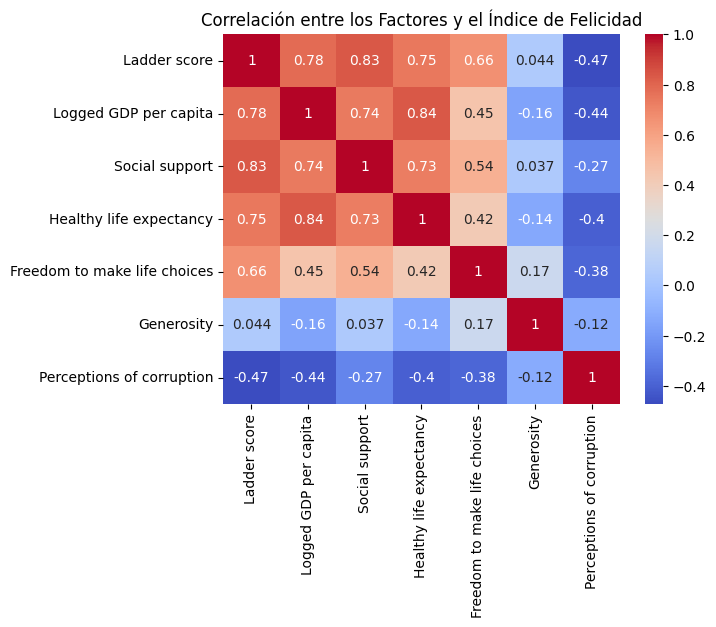

In [6]:
vars = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Matriz de correlacion
corr_matrix = df[vars].corr()

# Mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Grafica
plt.title('Correlación entre los Factores y el Índice de Felicidad')
plt.show()

En esta gráfica podemos ver la correlación que tienen unas variables con otras.  
  
Concretamente, nos interesa analizar la primera línea, en la cual correlacionamos el índice de felicidad (Ladder score) con el resto de variables.  
  
La variable que mayor correlación tiene con el índice de felicidad es el apoyo social, con un coeficiente de 0.83. Es decir, es una relación positiva y muy intensa, por lo que podemos decir que el factor que más influye en la felicidad de los habitantes de un país es el **apoyo social**. Esto significa que lo más importante para los habitantes es poder contar con amigos o familiares que les proporcionen apoyo diariamente.  
  
La riqueza y la esperanza de vida saludable también son factores altamente influyentes, con coeficientes de correlación de 0.78 y 0.75, respectivamente. Por tanto, estos dos factores, aunque en menor medida que el apoyo social, son de gran importancia para la estimación de este índice.  
  
La libertad para tomar decisiones tiene una correlación positiva (es decir, cuanto más alto sea, más alto será el índice de felicidad), pero no tan intensa, por lo que no es un factor tan importante.  
  
La generosidad, por otra parte, vemos que no es un factor que tenga importancia, ya que tiene una correlación (aunque positiva) muy baja, de 0.044.  
  
Finalmente, como era de esperar, la percepción de la corrupción tiene un coeficiente de correlación negativo, es decir, cuanto menor sea la corrupción, mayor será el índice de felicidad (y viceversa). Tiene una intensidad no demasiado grande pero sí notable, por lo que podemos decir que este factor tiene un impacto medianamente serio en las poblaciones.